### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
# Import the data set as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
# View the DataFrame.
print(reviews.shape)
reviews.info()

(2000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Any missing values?
# Replace the missing values with 0.
reviews.fillna(0, inplace=True)

# Determine the number of missing values.
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

No missing values were detected, which also confirmed observations made in Excel

In [5]:
# Explore the data
# Checking for outliers

# Calculate the first quartile, third quartile, and IQR for each column
Q1 = reviews.quantile(0.25, numeric_only=True)
Q3 = reviews.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Align the DataFrame before identifying outliers
reviews2, Q1_aligned = reviews.align(Q1, axis=1, copy=False)
reviews2, Q3_aligned = reviews.align(Q3, axis=1, copy=False)

# Identify outliers
outliers = reviews2[(reviews2 < (Q1_aligned - 1.5 * IQR)) | (reviews2 > (Q3_aligned + 1.5 * IQR))]

In [6]:
# Further analysis or visualization with outliers DataFrame
if outliers.empty:
    print("No outliers found.")
else:
    print("Outliers found.")

# Show outliers
print(outliers)

Outliers found.
      age education gender language  loyalty_points platform  product  \
0     NaN       NaN    NaN      NaN             NaN      NaN      NaN   
1     NaN       NaN    NaN      NaN             NaN      NaN      NaN   
2     NaN       NaN    NaN      NaN             NaN      NaN      NaN   
3     NaN       NaN    NaN      NaN             NaN      NaN      NaN   
4     NaN       NaN    NaN      NaN             NaN      NaN      NaN   
...   ...       ...    ...      ...             ...      ...      ...   
1995  NaN       NaN    NaN      NaN          4031.0      NaN      NaN   
1996  NaN       NaN    NaN      NaN             NaN      NaN      NaN   
1997  NaN       NaN    NaN      NaN          5614.0      NaN      NaN   
1998  NaN       NaN    NaN      NaN             NaN      NaN      NaN   
1999  NaN       NaN    NaN      NaN             NaN      NaN      NaN   

      remuneration (k£) review  spending_score (1-100) summary  
0                   NaN    NaN            

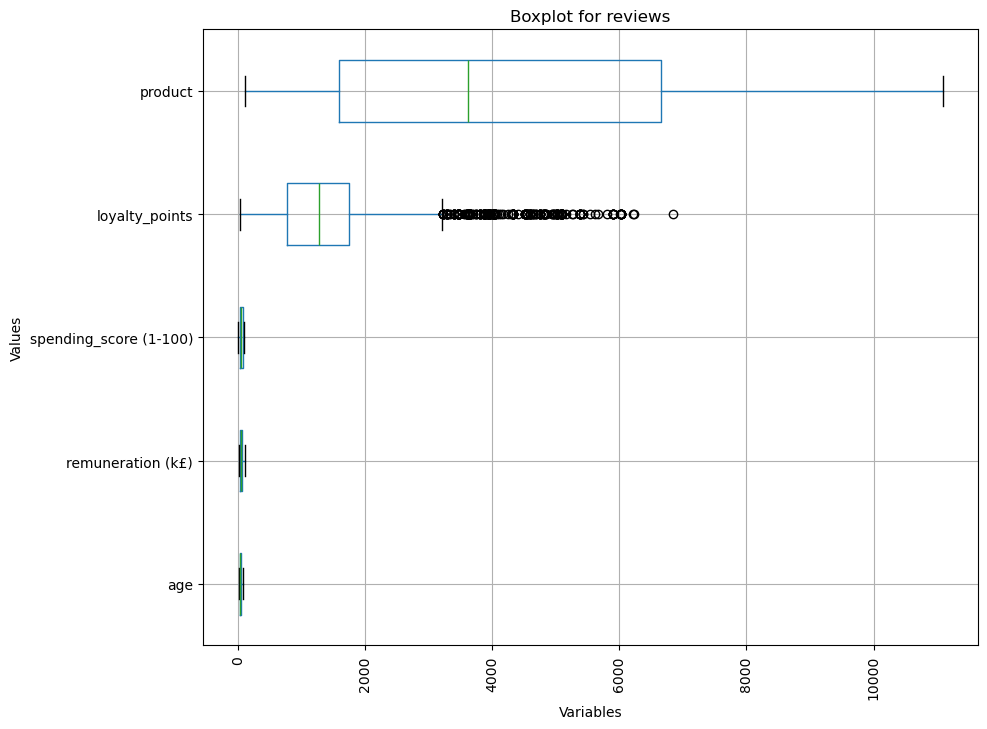

In [7]:
plt.figure(figsize=(10, 8))
reviews.boxplot(vert=False)
plt.title('Boxplot for reviews')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=90)
plt.show()

Outliers were found in the data as shown above. The results revealed outliers in the Loyalty point values. Given the nature of Loyalty points always increasing over time and ranging from a new client being at 0 to 6847 for the most loyal, then this result meant no outliers were removed from the data.

In [8]:
# Summary of descriptive statistics
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews2 = reviews.drop(['language', 'platform'],
                       axis=1)

# View column names.
reviews2.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [10]:
# View the DataFrame.
print(reviews2.shape)
reviews2.info()

(2000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


The columns 'language' and 'platform' were removed from the dataframe due to their statistical irrelevance with only one variable EN and Web in each column.

## 3. Rename columns

In [11]:
# Rename the column headers.
reviews2 = reviews2.rename(columns={'remuneration (k£)': 'income',
                            'spending_score (1-100)': 'spending',
                                 'loyalty_points' : 'loyalty'})

# View column names.
print(reviews2.columns)

Index(['gender', 'age', 'income', 'spending', 'loyalty', 'education',
       'product', 'review', 'summary'],
      dtype='object')


Columns were renamed from 'remuneration (k£)' to 'income' and 'spending_score (1-100)' to 'spending' for easier referencing.

## 4. Save the DataFrame as a CSV file

In [12]:
# Create a CSV file as output.
reviews2.to_csv('turtle_reviews2.csv', index=False)

In [13]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('turtle_reviews2.csv')

# View the DataFrame.
reviews.head()

gender  age  income  spending  loyalty education  product  \
0    Male   18   12.30        39      210  graduate      453   
1    Male   23   12.30        81      524  graduate      466   
2  Female   22   13.12         6       40  graduate      254   
3  Female   25   13.12        77      562  graduate      263   
4  Female   33   13.94        40      366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

The new dataframe was saved as a CSV file to be used for future analysis

## 5. Linear regression

### 5a) Spending vs Loyalty

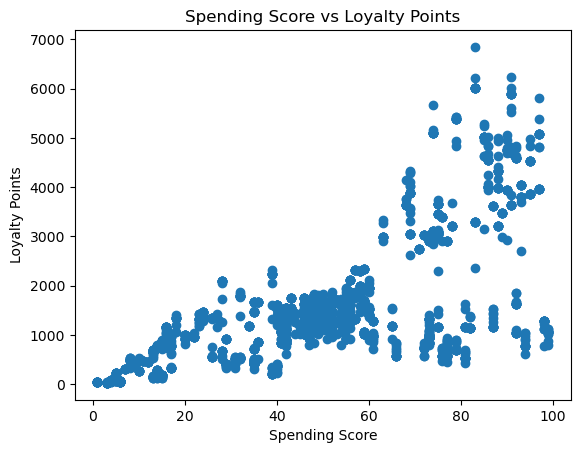

In [14]:
# Independent variable.
x = reviews2['spending']

# Dependent variable.
y = reviews2['loyalty']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Set the title and labels
plt.ylabel('Loyalty Points')
plt.xlabel('Spending Score')
plt.title('Spending Score vs Loyalty Points')

# Display the plot
plt.show()

Initial observations show a relationship between the variables even before the line of best fit has been added.

In [15]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews2).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.92e-263
Time:                        13:12:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [17]:
# Set the X coefficient and the constant to generate the regression table.
# Set the coefficient to 33.061693 and the constant to -75.052663.
y_pred = (-75.052663) + 33.061693 * reviews2['spending']

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending, Length: 2000, dtype: float64

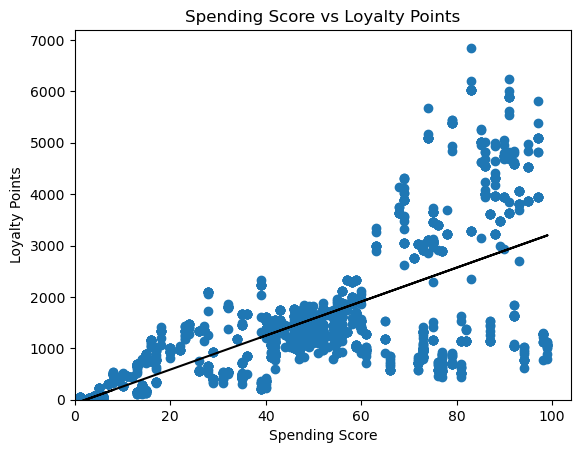

In [18]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the title and labels
plt.ylabel('Loyalty Points')
plt.xlabel('Spending Score')
plt.title('Spending Score vs Loyalty Points')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the plot as a file
plt.savefig('plot.png')

# View the plot.
plt.show()

After conducting a linear regression analysis on the spending score of a customer versus the Loyalty points they had acquired, there was a clear indication of a positive relationship between the variables. It can be concluded from this that when the spending score of any customer increases, so do the loyalty points. It has been calculated that for every 1-point increase in the spending score, the loyalty points should increase by 33. With the R-squared result showing 45.2%, the model is making a reasonable fit to the data, but there is room for improvement, as other factors could be influencing the loyalty points.

### 5b) Income vs Loyalty

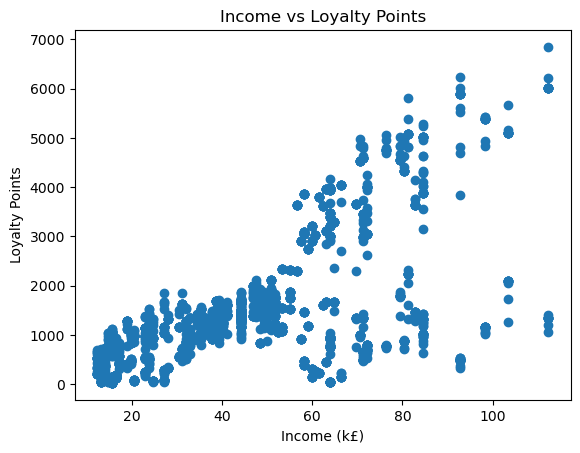

In [19]:
# Independent variable.
x = reviews2['income'] 

# Dependent variable.
y = reviews2['loyalty']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Set the title and labels
plt.ylabel('Loyalty Points')
plt.xlabel('Income (k£)')
plt.title('Income vs Loyalty Points')

# Display the plot
plt.show()

Again, initial observations are showing a relationship between the variables.

In [20]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews2).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          2.43e-209
Time:                        13:12:52   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
# Set the coefficient to 34.187825 and the constant to -65.686513.
y_pred = (-65.686513) + 34.187825 * reviews2['income']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: income, Length: 2000, dtype: float64

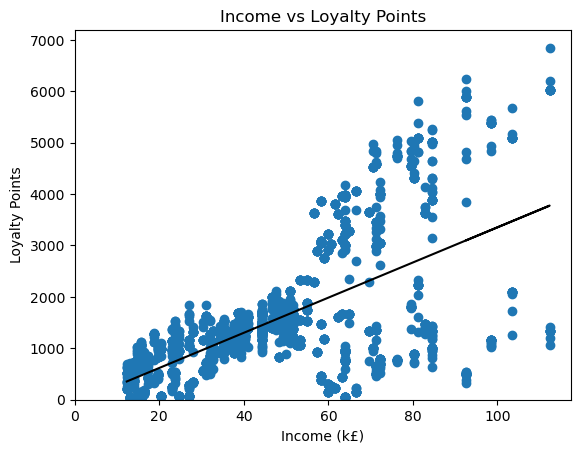

In [23]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the title and labels
plt.ylabel('Loyalty Points')
plt.xlabel('Income (k£)')
plt.title('Income vs Loyalty Points')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the plot as a file
plt.savefig('plot2.png')

# View the plot.
plt.show()

After conducting a linear regression analysis on the income of a customer versus the Loyalty points they had acquired, there was also a clear indication of a positive relationship between the variables. It can be concluded from this that when the income of any customer increases, their loyalty points also increase. This has been calculated to be 34.187825 points for every unit of income increase. With the R-squared result showing 38%, the model makes an adequate fit to the data, but there is still room for improvement, as other factors could be influencing loyalty points.

### 5c) Age vs Loyalty

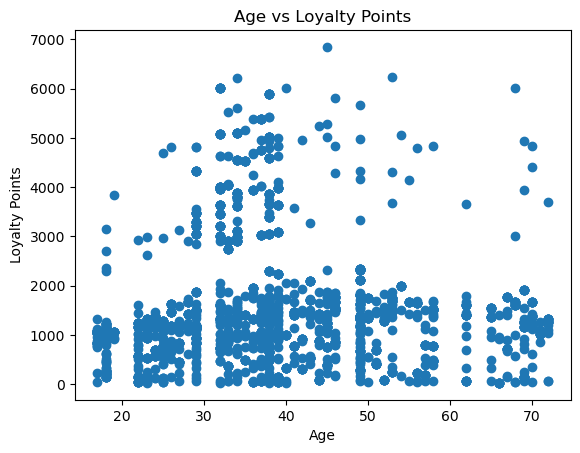

In [24]:
# Independent variable.
x = reviews2['age'] 

# Dependent variable.
y = reviews2['loyalty']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Set the title and labels
plt.ylabel('Loyalty Points')
plt.xlabel('Age')
plt.title('Age vs Loyalty Points')

# Display the plot
plt.show()

Initial observations are showing a very limited relationship bewtween the variables

In [25]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = reviews2).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 28 Feb 2024   Prob (F-statistic):             0.0577
Time:                        13:12:52   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [27]:
# Set the X coefficient and the constant to generate the regression table.
# Set the coefficient to -4.012805 and the constant to 1736.517739.
y_pred = (1736.517739) + -4.012805 * reviews2['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

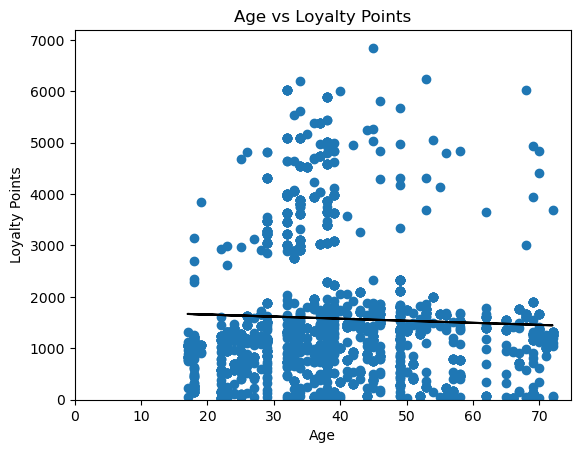

In [28]:
# Plot the graph with a regression line.
# Plot the data points with a scatterplot.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the title and labels
plt.ylabel('Loyalty Points')
plt.xlabel('Age')
plt.title('Age vs Loyalty Points')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Save the plot as a file
plt.savefig('plot8.png')

# View the plot.
plt.show()

After conducting a linear regression analysis on the age of a customer versus the Loyalty points they had acquired, there was an indication of a marginal negative relationship between the variables. It can be concluded from this that there is no significant relationship between the variables. For every year a customer gets older, their loyalty points drop by 4.012805. The R-squared result of 0.2% also reinforces this conclusion, along with the t-value being over 0.05.

### 5d) Age vs Income

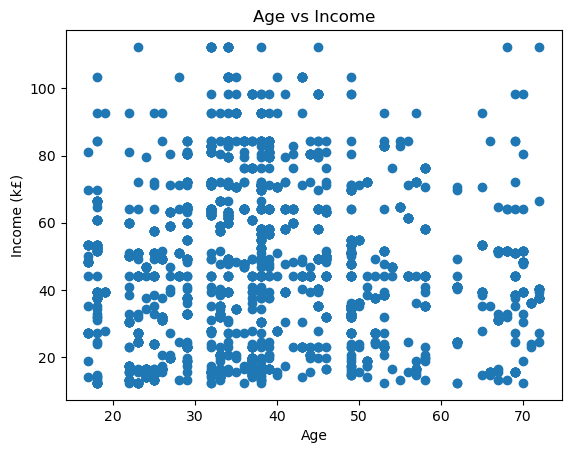

In [29]:
# Independent variable.
x = reviews2['age']

# Dependent variable.
y = reviews2['income']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Set the title and labels
plt.ylabel('Income (k£)')
plt.xlabel('Age')
plt.title('Age vs Income')

# Display the plot
plt.show()

A scatterplot was created to view the age of a customer in relationship to their income and from the initial view of this it was concluded there is no significant relationship, and due to this, it was unnecessary to continue and fit a line to the data. 

## 6. Multiple linear regression

A multiple linear regression was done using all the variable in question from the linear regression tests done above.

### 6a) Define variables

In [30]:
# Define the dependent variable.
y = reviews2['loyalty'] 

# Define the independent variable.
X = reviews2[['income', 'spending', 'age']]

In [31]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [32]:
# Call the predictions for X (array).
multi.predict(X)

array([ -252.52008641,  1238.47746341, -1308.43606252, ...,
        4434.8905332 ,  2066.35892261,  1575.56389984])

In [33]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.8399114912748796
Intercept:  -2203.0597513079
Coefficients:


[('income', 34.00838549260248),
 ('spending', 34.18319657763366),
 ('age', 11.060658711843352)]

### 6b) Training and testing subsets with MLR

In [34]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [35]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                loyalty   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:12:53   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2197.0105     58.134    -37.792      0.0

In [36]:
# Print the model score.
print(multi.score(x_train, y_train)*100)

84.24398896169723


### 6c) Run a regression test

In [37]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [38]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1581.73296854  796.88423068 2185.24039458 ... 1789.93373561 1399.81947689
 1437.21562445]


In [39]:
# Print the model score.
print(mlr.score(x_test, y_test)*100)

82.90723396315803


### 6d) Check for multicollinearity

In [40]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor  features
0        20.7     const
1         1.0    income
2         1.1  spending
3         1.1       age


In [41]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [42]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 39.20687709402291, 'LM Test p-value': 1.569051868116597e-08, 'F-stat': 13.36375609804418, 'F-test p-value': 1.289912821696093e-08}


### 6e) Evaluate the model

In [43]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))

Mean Absolute Error (Final): 402.23503056376927
Mean Square Error (Final): 277188.7023322059


Conducting a multiple linear regression test using an 80/20 split revealed that 84.2% of the variance in loyalty is explained by the independent variables income, spending, and age and there is no or very low multicollinearity between those variables as shown by the VIF factor results. The Mean Absolute Error of 402 although high, in context with loyalty points of up to circa 7000 isn't as bad as it seems.

## 7. Multiple linear regression, excluding Age

Due to Age having no relationship with Loyalty points in the linear regression analysis above a further multiple linear regression test was done.

### 7a) Define variables

In [44]:
# Define the dependent variable.
y = reviews2['loyalty'] 

# Define the independent variable.
X = reviews2[['income', 'spending']]

In [45]:
# Specify the model.
multi = LinearRegression()  

# Fit the model.
multi.fit(X, y)

LinearRegression()

In [46]:
# Call the predictions for X (array).
multi.predict(X)

array([ 4.57831319e-01,  1.38195101e+03, -1.05713790e+03, ...,
        4.44147048e+03,  2.16956070e+03,  1.71137682e+03])

In [47]:
# Checking the value of R-squared, intercept and coefficients.
print("R-squared: ", multi.score(X, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(X, multi.coef_))

R-squared:  0.826913470198926
Intercept:  -1700.3050970144361
Coefficients:


[('income', 33.97949882180283), ('spending', 32.89269468782098)]

### 7b) Training and testing subsets with MLR

In [48]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [49]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                loyalty   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     3895.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:12:53   Log-Likelihood:                -12307.
No. Observations:                1600   AIC:                         2.462e+04
Df Residuals:                    1597   BIC:                         2.464e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1700.3237     39.588    -42.950      0.0

In [50]:
# Print the model score.
print(multi.score(x_train, y_train)*100)

82.9782305142594


### 7c) Run a regression test

In [51]:
# Run regression on the train subset.
mlr = LinearRegression()  

mlr.fit(x_train, y_train)

LinearRegression()

In [52]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr)) 

Prediction for test set: [1630.49111009  512.07788432 2146.32624449 ... 1422.83416662 1259.61480693
 1441.17214231]


In [53]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100)

81.44236432529975


### 7d) Check for multicollinearity

In [54]:
# Check multicollinearity.
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor  features
0         8.9     const
1         1.0    income
2         1.0  spending


In [55]:
# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [56]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 45.093019717500304, 'LM Test p-value': 1.6150098749730242e-10, 'F-stat': 23.156868353553996, 'F-test p-value': 1.2194606385153543e-10}


In [57]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))

Mean Absolute Error (Final): 429.66362016909113
Mean Square Error (Final): 300944.0917834269


After removing Age from the multiple linear regression test, the results using Spending Score and Income came back very similar and reinforced the fact that Age is a variable with no relationship with Loyalty points and should be disregarded as a factor. It is evident that Spending Score and Income are the main drivers of the variance in Loyalty points.

## 7. Observations and insights

From the analysis conducted two variables Spending Score and Income were deducted to have the biggest influence on the Loyalty points of a customer. Therefore using that knowledge would be beneficial when using any strategy to target customers.

Some suggested strategies that could be tailored to engage and improve customer behaviour by leveraging this knowledge could be: 

Promotions and Discounts: 
Offer targeted promotions and discounts to customers with higher spending scores, encouraging them to spend more and earn more loyalty points.

Tiered Loyalty Program :
Introduce tiered loyalty programs based on income and spending score levels. Higher tiers can provide more benefits, such as exclusive offers, early access to sales, or increased points per purchase.

Personalized Recommendations:
Use customer data to provide personalized product recommendations. Suggest products or services that align with their spending patterns, increasing the likelihood of additional purchases.

Special Events and Experiences:
Reward loyal customers with special events or experiences. This can include exclusive sales events, product launches, or access to premium content, creating a sense of exclusivity and appreciation.

Referral  Programs:
Encourage customers to refer friends or family by offering additional loyalty points for successful referrals to not only boost sales but also expand the customer base.

Social Media Engagement: 
Use social media platforms to engage with customers. Conduct contests, polls, or interactive campaigns that reward participants with extra loyalty points, fostering brand engagement and loyalty.

Survey and Feedback Incentives: 
Encourage customers to provide feedback by offering loyalty points as an incentive. Use the insights gained to improve products and services, enhancing the overall customer experience.

Communication and Updates: 
Keep customers informed about their loyalty points, upcoming promotions, and exclusive offers through regular communication channels to create anticipation and drive repeat purchases.

Partnerships and Alliances: 
Form partnerships with other businesses to provide joint promotions or exclusive offers to customers. Collaborative efforts can attract a broader customer base and increase sales.

It is unknown for now if any of these strategies are in place already so it is important to ascertain these facts and then add those not already being used to the business strategy moving forward.

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [58]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [59]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews2.csv')

# View DataFrame.
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   income     2000 non-null   float64
 3   spending   2000 non-null   int64  
 4   loyalty    2000 non-null   int64  
 5   education  2000 non-null   object 
 6   product    2000 non-null   int64  
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


gender  age  income  spending  loyalty education  product  \
0    Male   18   12.30        39      210  graduate      453   
1    Male   23   12.30        81      524  graduate      466   
2  Female   22   13.12         6       40  graduate      254   
3  Female   25   13.12        77      562  graduate      263   
4  Female   33   13.94        40      366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [60]:
# Drop unnecessary columns.
df2 = df2.drop(columns=['review', 'summary', 'product'])

# View DataFrame.
df2.head()

gender  age  income  spending  loyalty education
0    Male   18   12.30        39      210  graduate
1    Male   23   12.30        81      524  graduate
2  Female   22   13.12         6       40  graduate
3  Female   25   13.12        77      562  graduate
4  Female   33   13.94        40      366  graduate

In [61]:
# Explore the data.
# Determine whether there are null values
df2.isnull().sum()

gender       0
age          0
income       0
spending     0
loyalty      0
education    0
dtype: int64

In [62]:
# Descriptive statistics.
df2.describe()

age       income     spending      loyalty
count  2000.000000  2000.000000  2000.000000  2000.000000
mean     39.495000    48.079060    50.000000  1578.032000
std      13.573212    23.123984    26.094702  1283.239705
min      17.000000    12.300000     1.000000    25.000000
25%      29.000000    30.340000    32.000000   772.000000
50%      38.000000    47.150000    50.000000  1276.000000
75%      49.000000    63.960000    73.000000  1751.250000
max      72.000000   112.340000    99.000000  6847.000000

## 2. Plot

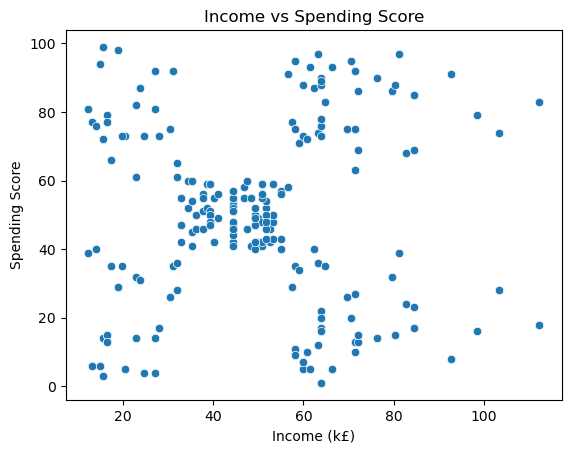

In [63]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='income',
                y='spending',
                data=df2)

# Insert labels and title.
plt.title('Income vs Spending Score')
plt.xlabel("Income (k£)")
plt.ylabel("Spending Score")

plt.show()

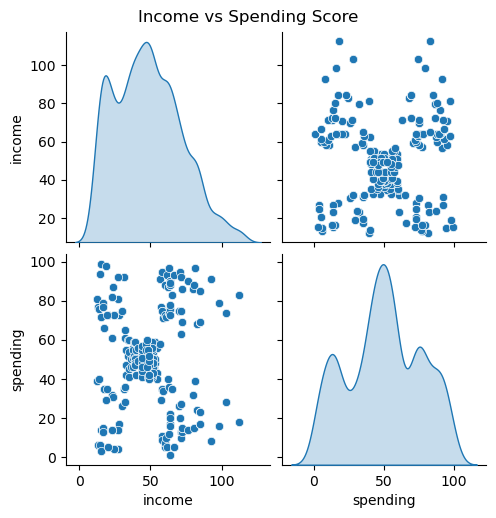

In [64]:
# Create a pairplot with Seaborn.
x = df2[['income', 'spending']]

sns.pairplot(df2,
             vars=x,
             diag_kind= 'kde')

# Insert title.
plt.suptitle('Income vs Spending Score', y=1.02)

plt.show()

Initial visuals of the data show what looks like 5 clusters with one central cluster and 4 gravitating around it.

## 3. Elbow and silhoutte methods

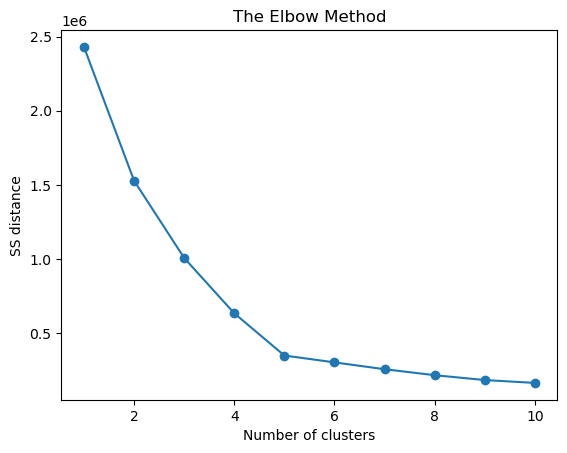

In [65]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

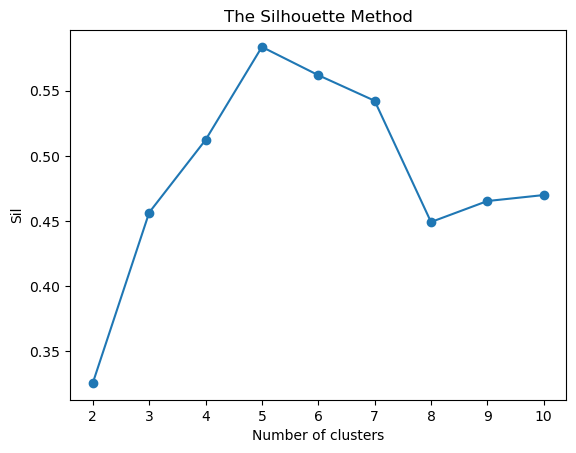

In [66]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

After the elbow and silhouette methods to determine optimal values of k were completed it was evident evaluations from 4 to 7 should be conducted.

## 4. Evaluate k-means model at different values of *k*

### Five clusters

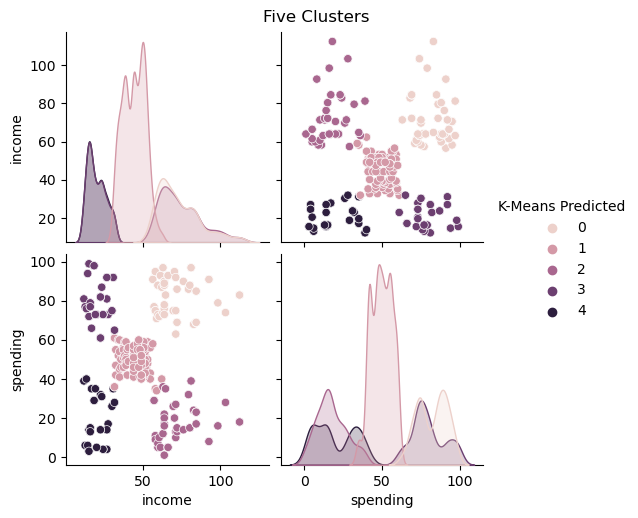

In [67]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert title.
plt.suptitle('Five Clusters', y=1.02)

# Show the plot
plt.show()

In [68]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

In [69]:
# View the K-Means predicted.
print(x.head())

   income  spending  K-Means Predicted
0   12.30        39                  4
1   12.30        81                  3
2   13.12         6                  4
3   13.12        77                  3
4   13.94        40                  4


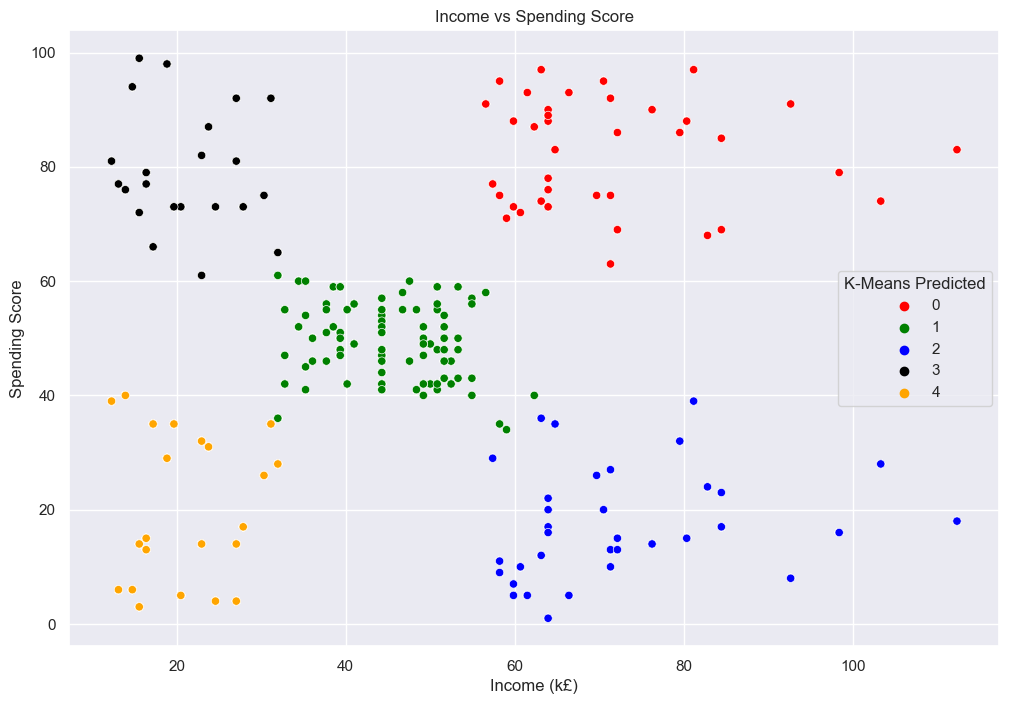

In [70]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# Insert labels and title.
plt.title('Income vs Spending Score')
plt.xlabel("Income (k£)")
plt.ylabel("Spending Score")

# Show the plot
plt.show()

This model appears to be a good fit as there is a good distribution of observations. The larger group, Group 1, in the central position has 774 observations, and the other four groups, ranging from 269 to 356, exhibit a nice symmetry. What I also like is that the low-income observations in Group 3 (269) and Group 4 (271) are very similar, along with the high-income observations in Group 0 (356) and Group 2 (330).

### Six clusters

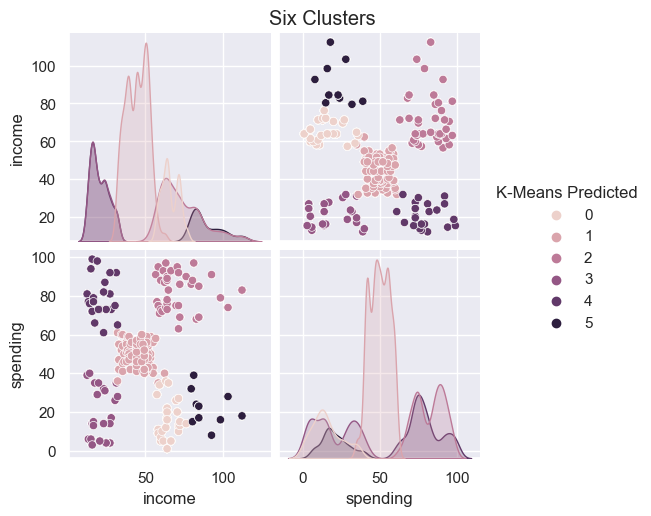

In [71]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert title.
plt.suptitle('Six Clusters', y=1.02)

# Show the plot
plt.show()

In [72]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    767
2    356
3    271
4    269
0    214
5    123
Name: count, dtype: int64

In [73]:
# View the K-Means predicted.
print(x.head())

   income  spending  K-Means Predicted
0   12.30        39                  3
1   12.30        81                  4
2   13.12         6                  3
3   13.12        77                  4
4   13.94        40                  3


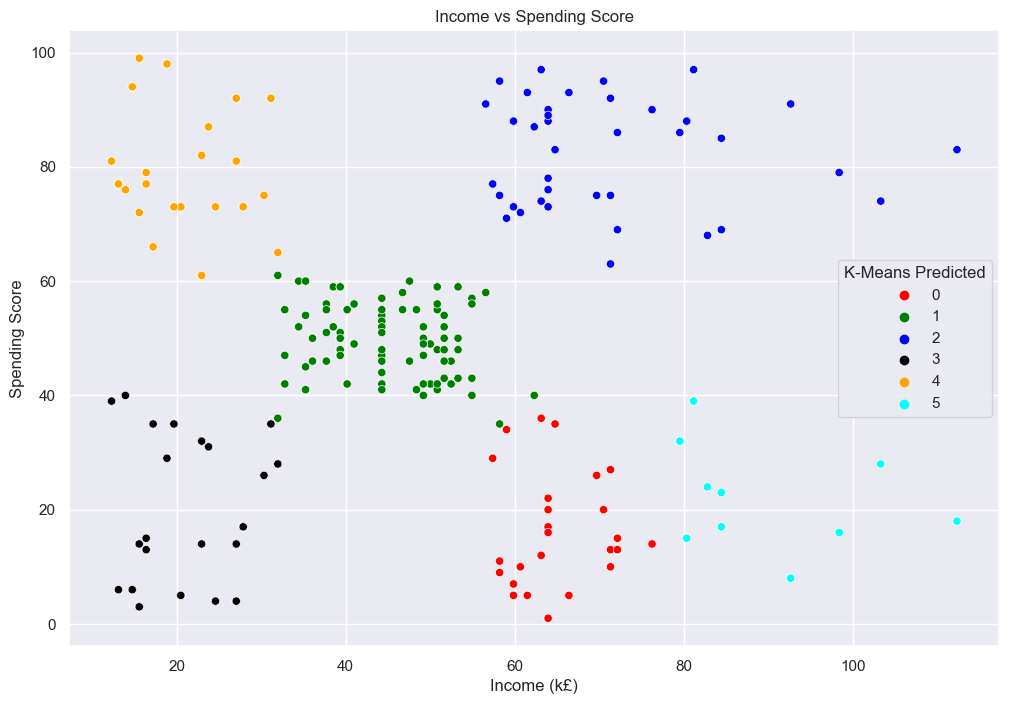

In [74]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'cyan'])

# Insert labels and title.
plt.title('Income vs Spending Score')
plt.xlabel("Income (k£)")
plt.ylabel("Spending Score")

# Show the plot
plt.show()

This doesn't strike me as an improvement at all, and I don't believe classifying those with 80k and higher incomes and low spending scores differently than those with 60k and higher incomes with low scores has any benefits. Any strategy to leverage high income and low spending scores for a promotion or advertising campaign would work the same.

### Seven clusters

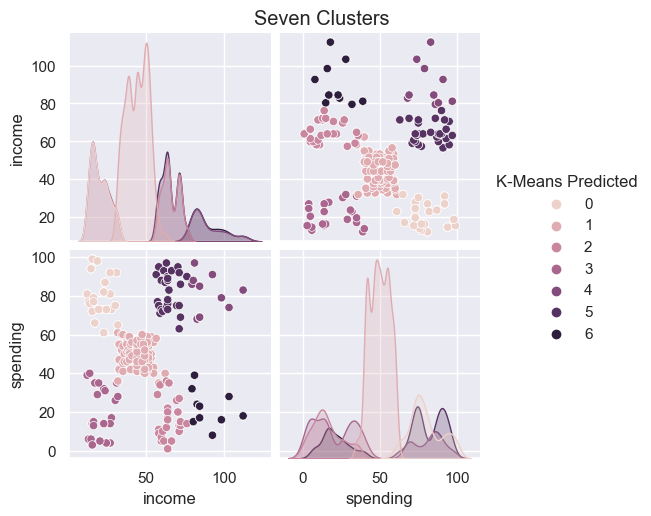

In [75]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert title.
plt.suptitle('Seven Clusters', y=1.02)

# Show the plot
plt.show()

In [76]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    767
3    271
0    269
5    238
2    214
6    123
4    118
Name: count, dtype: int64

In [77]:
# View the K-Means predicted.
print(x.head())

   income  spending  K-Means Predicted
0   12.30        39                  3
1   12.30        81                  0
2   13.12         6                  3
3   13.12        77                  0
4   13.94        40                  3


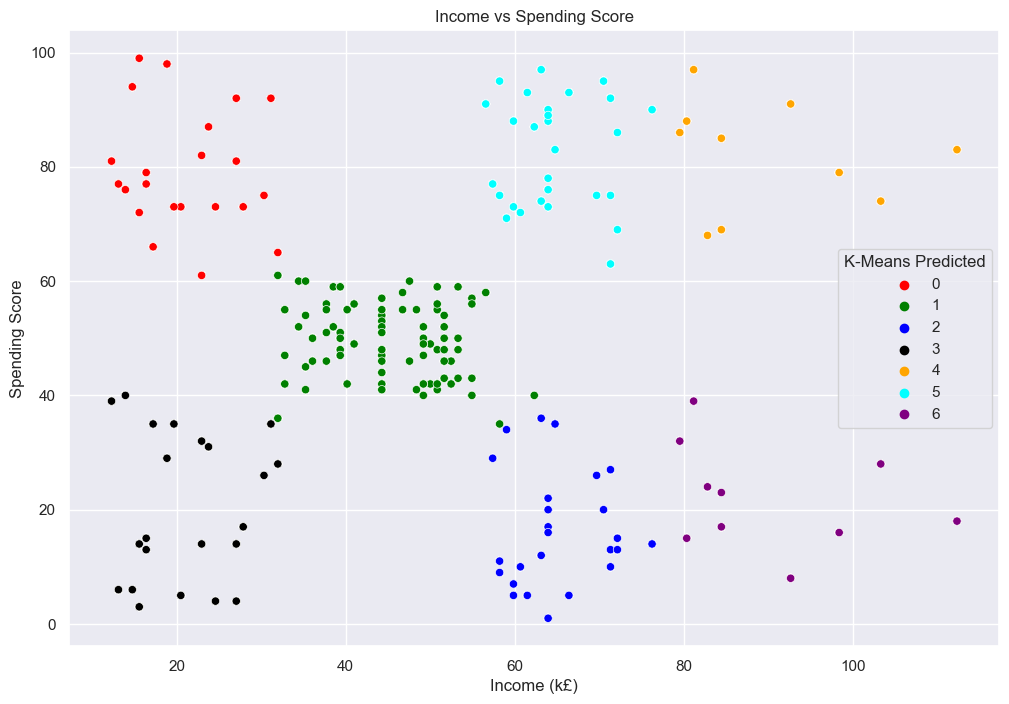

In [78]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange', 'cyan', 'purple'])

# Insert labels and title.
plt.title('Income vs Spending Score')
plt.xlabel("Income (k£)")
plt.ylabel("Spending Score")

# Show the plot
plt.show()

Again, along with the above conclusions, this is not an improvement on the original 5-cluster model for the similar reasons.

### Four clusters

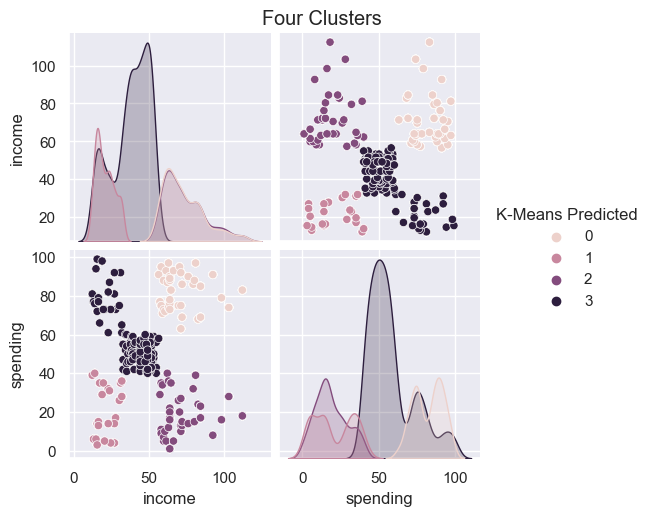

In [79]:
# Use four clusters.
kmeans = KMeans(n_clusters = 4, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

# Insert title.
plt.suptitle('Four Clusters', y=1.02)

# Show the plot
plt.show()

In [80]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
3    1013
0     356
2     351
1     280
Name: count, dtype: int64

In [81]:
# View the K-Means predicted.
print(x.head())

   income  spending  K-Means Predicted
0   12.30        39                  1
1   12.30        81                  3
2   13.12         6                  1
3   13.12        77                  3
4   13.94        40                  1


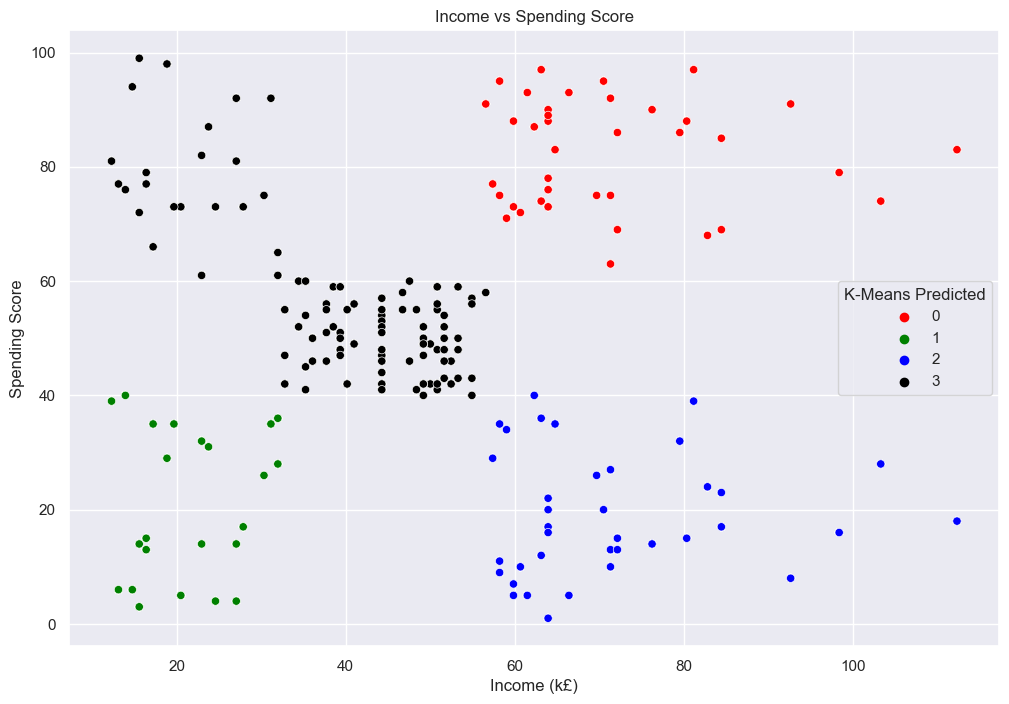

In [82]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

# Insert labels and title.
plt.title('Income vs Spending Score')
plt.xlabel("Income (k£)")
plt.ylabel("Spending Score")

# Show the plot
plt.show()

This model reaffirms what has already been observed: the 5-cluster model is the optimal option. This 4-cluster version is grouping far too many into group 3 and leaves the data far too imbalanced because of that.

## 5. Fit final model and justify your choice

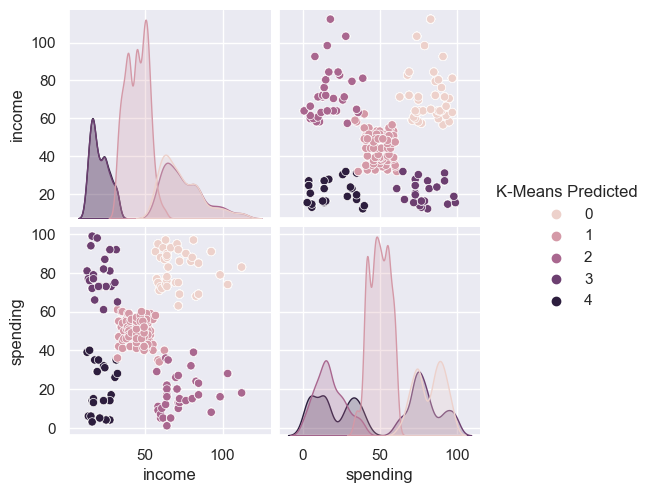

In [83]:
# Apply the final model: # Five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [84]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    774
0    356
2    330
4    271
3    269
Name: count, dtype: int64

### Justification of model decision

The 5-cluster model was chosen as it appears to be a good fit, showcasing a well-distributed set of observations. The larger group, Group 1, situated in the central position, contains 774 observations, while the other four groups, ranging from 269 to 356, exhibit a nice symmetry. Additionally, I appreciate the similarity between the low-income observations in Group 3 (269) and Group 4 (271), as well as the high-income observations in Group 0 (356) and Group 2 (330). Evaluations of the 4, 6, and 7 cluster models revealed that increasing the number of clusters diluted the observations into groups that were not any more beneficial, and reducing it resulted in the data not being sufficiently defined, leading to a loss of accuracy and balance.

## 6. Plot and interpret the clusters

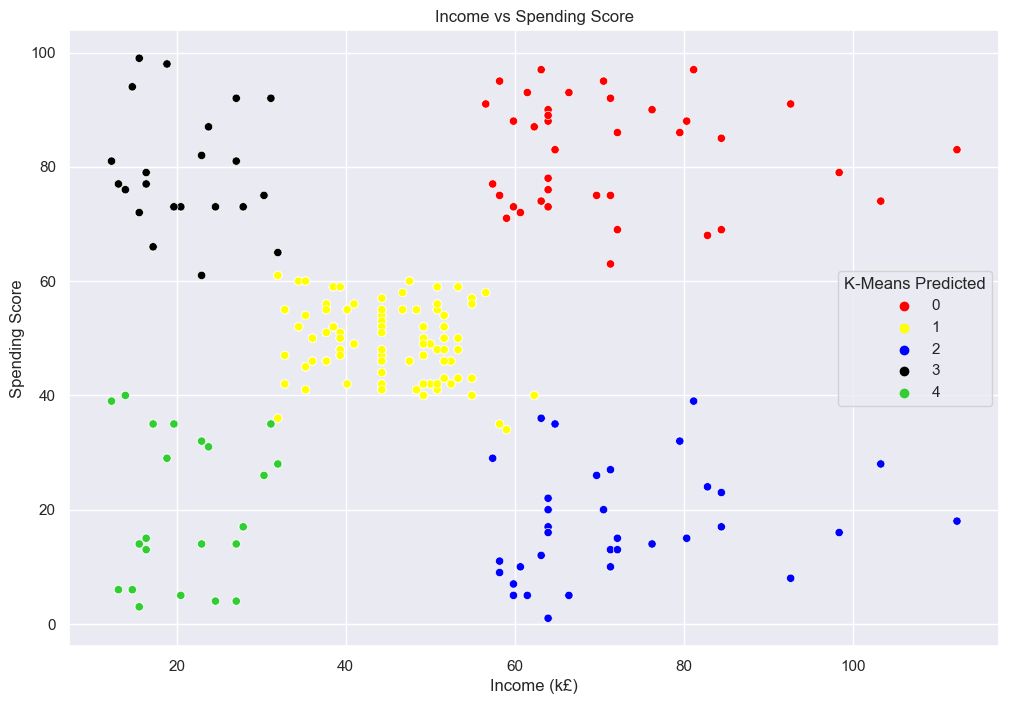

In [135]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='income' , 
                y ='spending',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'yellow', 'blue', 'black', 'limegreen'])

# Insert labels and title.
plt.title('Income vs Spending Score')
plt.xlabel("Income (k£)")
plt.ylabel("Spending Score")

# Save the plot as a file
plt.savefig('plot3.png')

# Show the plot
plt.show()

## 7. Discuss: Insights and observations

***Your observations here...***

The model has defined 5 clear groups, each of which has a specific identity based on the variables of Income and Spending Score. From the outcomes, it provides a clear picture of the income constraints and historical spending habits that can be used to target specific campaigns accordingly. Below are each of the groups and their parameters, along with some suggestions for how to target them.

#### Group 1 (774 customers, mid-income, mid spending score):

1. Implement targeted promotions for products.
    
2. Encourage the loyalty program reiterating exclusive rewards for repeat customers.
    
3. Send personalized emails or notifications about special discounts on preferred products.
    
This is the largest group, at over twice the size of any of the others making it a key group to target, as any benefits from the strategies above would be far greater with a similar uptake of any promotion compared to other groups. 

#### Group 0 (356 customers, high-income, high spending score):

1. Focus on premium products and create exclusive offers for high-spending customers.
    
2. Provide VIP treatment, such as early access to sales or invitation-only events.
    
3. Use personalized communication channels, such as dedicated account managers or premium customer support.

This group is already spending well and has the income to do so. Any strategy to increase engagement should acknowledge that and reward them accordingly. 


#### Group 2 (330 customers, high-income, low spending score):

1. Offer points, discounts, or exclusive perks for repeat purchases or reaching certain spending thresholds.

2. Provide incentives for first-time purchases or referrals to increase customer acquisition and keep them active.

3. Extend invitations to exclusive events, product launches, or VIP gatherings.

4. Offer discounts on bundled items to incentivize multiple purchases.

5. Introduce frequent promotions, flash sales, or limited-time discounts to keep them engaged. 

This group has the income to be able to spend more but is not engaging regularly. There is definite room for growth due to that so a campaign to encourage engagement would be beneficial. Getting them active and keeping them active should be the focus of strategies for this group. 

#### Group 4 (271 customers, low-income, low spending score):

1. Focus on offering affordable options and promotions to cater to their lower income.

2. Offer flexible payment options or financing to accommodate their lower income.

3. Implement a referral program to incentivize existing customers to bring in new ones.

This group will be the most difficult to increase engagement with due to their income constraints and historically low interaction levels. Strategies such as facilitating payments through payment plans and offering affordable deals would be helpful. Additionally, leveraging their networks to encourage new customers by incentivizing referrals could also prove beneficial.

#### Group 3 (269 customers, low-income and high spending score):

1. Focus on premium products and create exclusive offers for high-spending customers.
    
2. Provide VIP treatment, such as early access to sales or invitation-only events.

3. Use personalized communication channels, such as dedicated account managers or premium customer support.

This group, with already high levels of engagement yet low income constraints, will be the hardest to extract any benefits from a targeted campaign. Therefore, a strategy that mirrors the high-income, high-spending score group is recommended, allowing the cost to be spread over both groups and the value to increase.

Improving Groups One and Two engagement I think would have the greatest results from targeted campaigns but if costs allow then engagement with all the groups would be encouraged. A cost analysis would be beneficial for all strategies so that more informed decisions can be made for each method of engagement and whether to implement them if they are not already.

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [86]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hyper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hyper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
# Load the CSV file(s) as df2.
df3 = pd.read_csv('turtle_reviews2.csv')

# View DataFrame.
df3.head()

gender  age  income  spending  loyalty education  product  \
0    Male   18   12.30        39      210  graduate      453   
1    Male   23   12.30        81      524  graduate      466   
2  Female   22   13.12         6       40  graduate      254   
3  Female   25   13.12        77      562  graduate      263   
4  Female   33   13.94        40      366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [88]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gender     2000 non-null   object 
 1   age        2000 non-null   int64  
 2   income     2000 non-null   float64
 3   spending   2000 non-null   int64  
 4   loyalty    2000 non-null   int64  
 5   education  2000 non-null   object 
 6   product    2000 non-null   int64  
 7   review     2000 non-null   object 
 8   summary    2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [89]:
# Keep necessary columns. Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [90]:
# Determine if there are any missing values.
missing_values = df3.isnull()

# Print the resulting dataframe
print(missing_values)

      review  summary
0      False    False
1      False    False
2      False    False
3      False    False
4      False    False
...      ...      ...
1995   False    False
1996   False    False
1997   False    False
1998   False    False
1999   False    False

[2000 rows x 2 columns]


After importing the data into the notebook, the columns 'review' and 'summary' were retained, and then a check was performed to determine if there were any missing values in the resulting dataframe. None were found, indicating that there are 2000 reviews available for analysis.

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [91]:
# Review: Change all to lowercase and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [92]:
# Summary: Change all to lowercase and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [93]:
# View the dataframe
df3.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [94]:
# Replace all the punctuations in the review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [95]:
# Replace all the punctuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [96]:
# Check the number of duplicate values in the columns.
df3[['review', 'summary']].duplicated().sum()

25

In [97]:
# Drop duplicates in both columns.
df4 = df3.drop_duplicates(subset=['review', 'summary'])

# View DataFrame.
print(df4.shape)
df4.head()

(1975, 2)


review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

25 duplicates were removed, along with aligning each column into lowercase and removing punctuations.

## 3. Tokenise and create wordclouds

In [98]:
# Create new DataFrame (copy DataFrame).
df4_copy = df4.copy()

# View DataFrame.
df4_copy.head()

review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*: your unpainted ...   
2  nice art, nice printing. why two panels are fi...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [99]:
# Tokenise the words in review into a new column called 'tokens'.
df4_copy['tokens1'] = df4_copy['review'].apply(word_tokenize)

# Preview data.
df4_copy['tokens1'].head()

0    [when, it, comes, to, a, dm, 's, screen, ,, th...
1    [an, open, letter, to, galeforce9, *, :, your,...
2    [nice, art, ,, nice, printing, ., why, two, pa...
3    [amazing, buy, !, bought, it, as, a, gift, for...
4    [as, my, review, of, gf9, 's, previous, screen...
Name: tokens1, dtype: object

In [100]:
# Tokenise the words in summary into a new column called 'tokens2'.
df4_copy['tokens2'] = df4_copy['summary'].apply(word_tokenize)

# Preview data.
df4_copy['tokens2'].head()

0    [the, fact, that, 50, %, of, this, space, is, ...
1    [another, worthless, dungeon, master, 's, scre...
2              [pretty, ,, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens2, dtype: object

In [101]:
# Review: Create a word cloud.
# Combine all tokenized words in reviews into a single string
review_comments = ' '.join(df4_copy['tokens1'].apply(lambda x: ' '.join(x)))

In [102]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(review_comments)

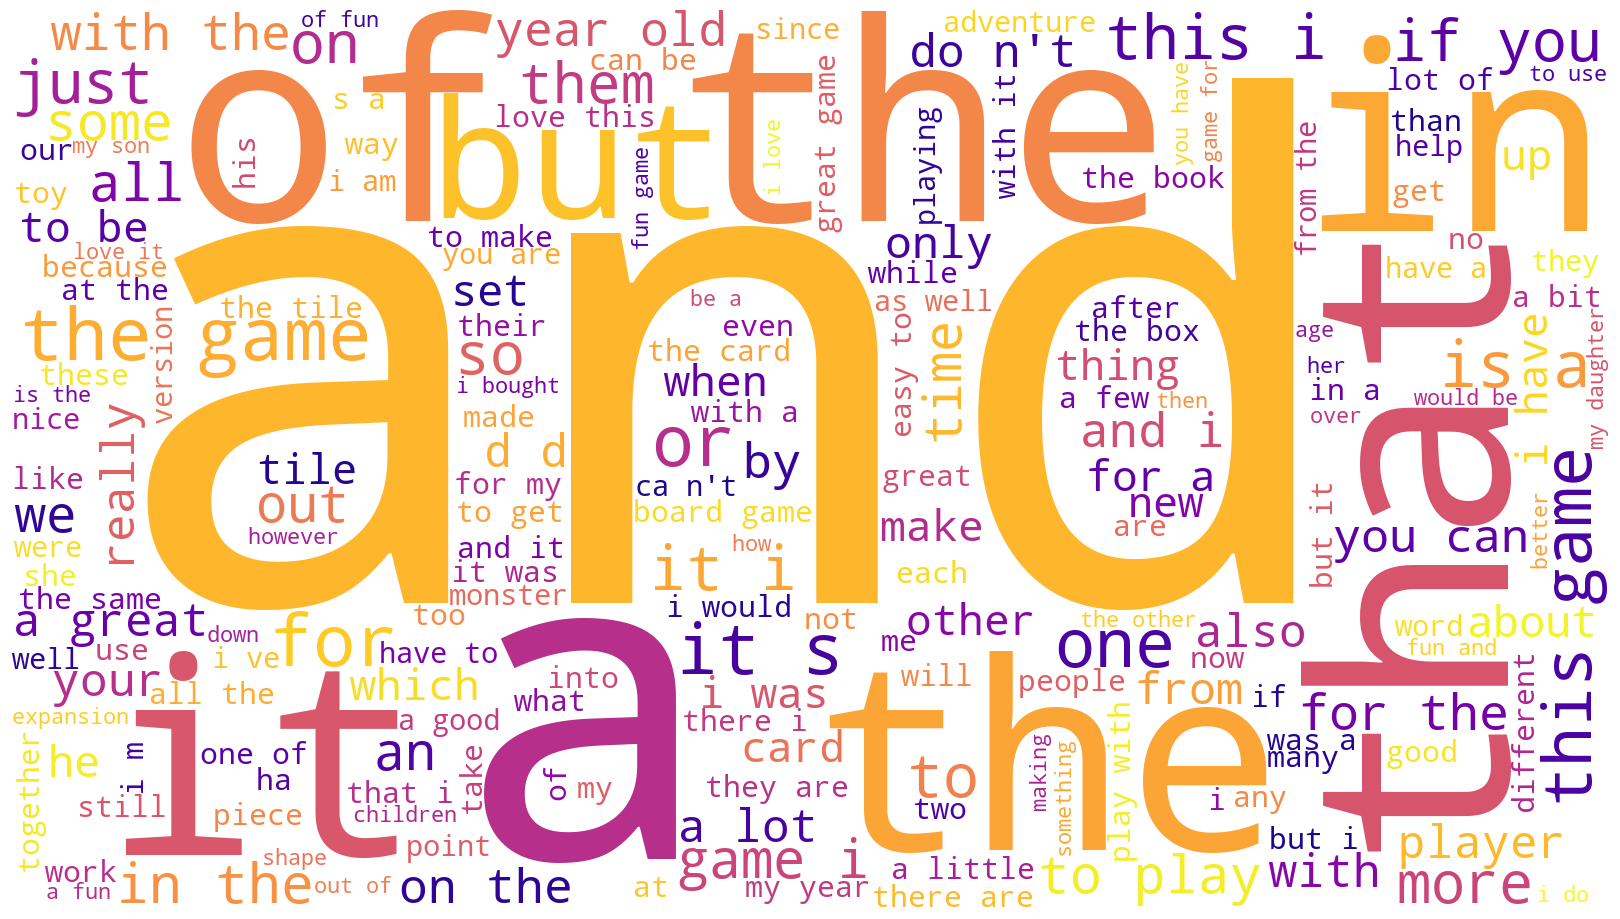

In [103]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [104]:
# Summary: Create a word cloud.
# Combine all tokenized words in summary into a single string
summary_comments = ' '.join(df4_copy['tokens2'].apply(lambda x: ' '.join(x)))

In [105]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_comments)

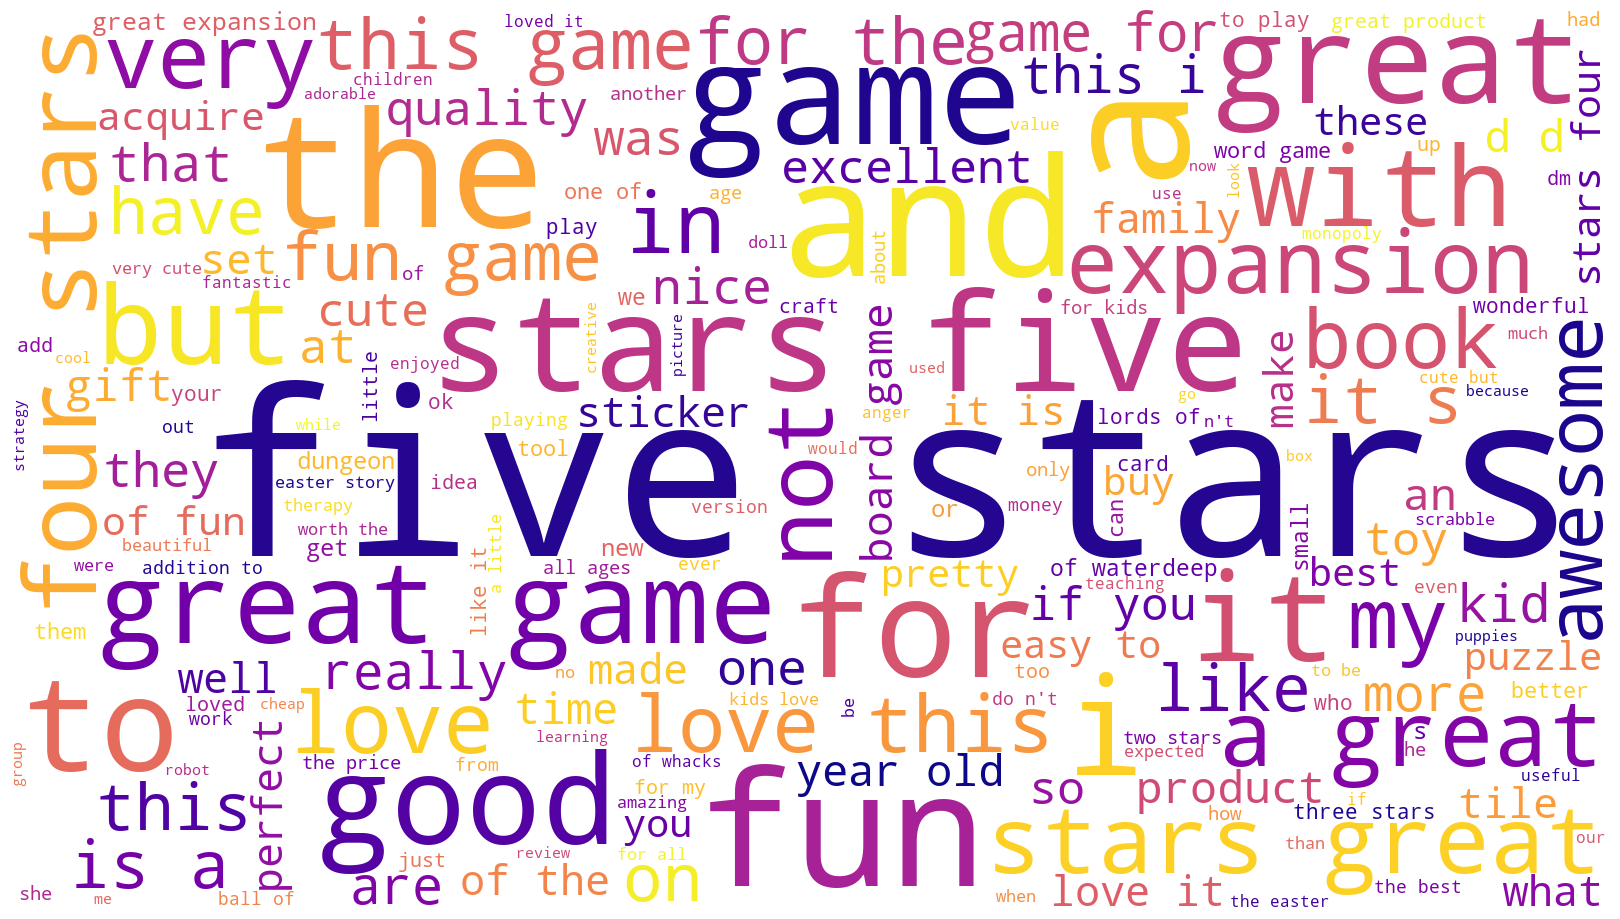

In [106]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

So far from the two word clouds produced the review results showed up a lot more stopwords than summary, summary at this initial stage looks to be showing some positive signs but cleaner data will be better for a more robust conclusion.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [107]:
# Combine all tokenized words in 'tokens1' into a single list
review_words = [word for sublist in df4_copy['tokens1'] for word in sublist]

# Calculate the frequency distribution for review.
fdist = FreqDist(review_words)

# Preview data.
fdist

FreqDist({'.': 6470, 'the': 5457, ',': 3793, 'and': 3247, 'a': 3169, 'to': 3163, 'of': 2491, 'it': 2488, 'i': 2345, 'is': 1834, ...})

In [108]:
# Combine all tokenized words in 'tokens2' into a single list
summary_words = [word for sublist in df4_copy['tokens2'] for word in sublist]

# Calculate the frequency distribution for summary.
fdist2 = FreqDist(summary_words)

# Preview data.
fdist2

FreqDist({'stars': 441, '!': 426, 'five': 356, 'game': 318, 'great': 294, 'the': 261, 'a': 239, 'for': 232, '.': 218, 'fun': 217, ...})

Again this shows the heavier use of stopwords in reviews as noted in the word clouds. 

### 4b) Remove alphanumeric characters and stopwords

In [109]:
# Delete all the alpanumeric characters.
tokens1 = [word for word in review_words if word.isalnum()]
tokens2 = [word for word in summary_words if word.isalnum()]

In [110]:
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords for reviews.
tokens1r = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens1r_string = ''

for value in tokens1:
    # Add each filtered token word to the string.
    tokens1r_string = tokens1r_string + value + ' '

In [111]:
# Create a filtered list of tokens without stopwords for summary.
tokens2s = [x for x in tokens2 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2s_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2s_string = tokens2s_string + value + ' '

### 4c) Create wordcloud without stopwords

In [112]:
# Create a wordcloud without stop words for review.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens1r_string)

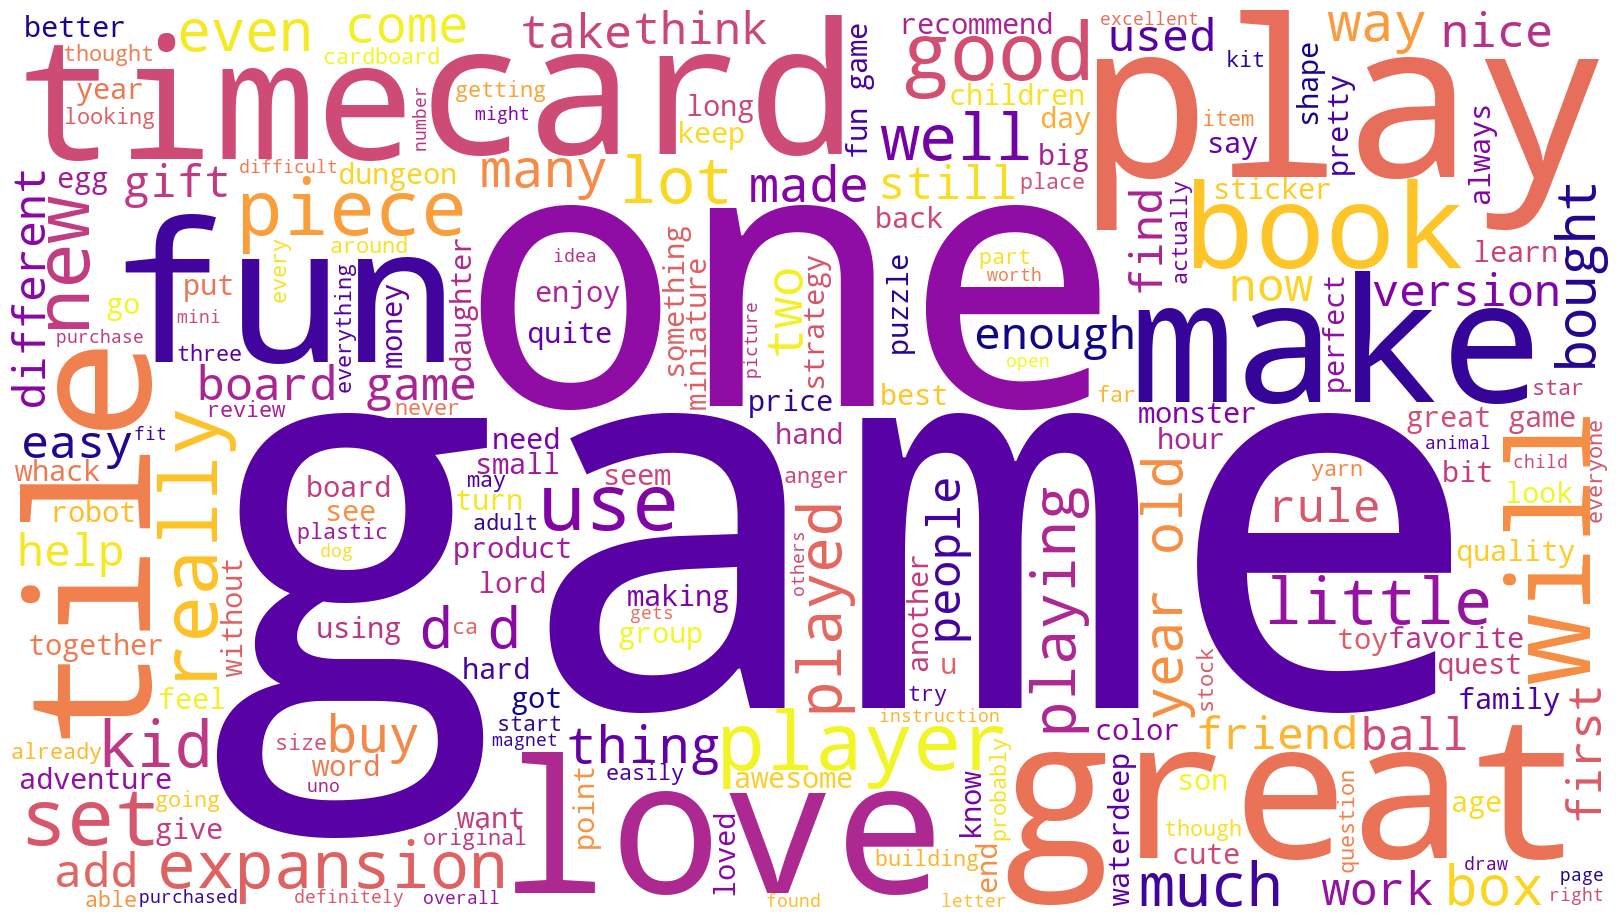

In [113]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Save the plot as a file
wordcloud.to_file('plot4.png')

In [114]:
# Create a wordcloud without stop words for summary.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2s_string)

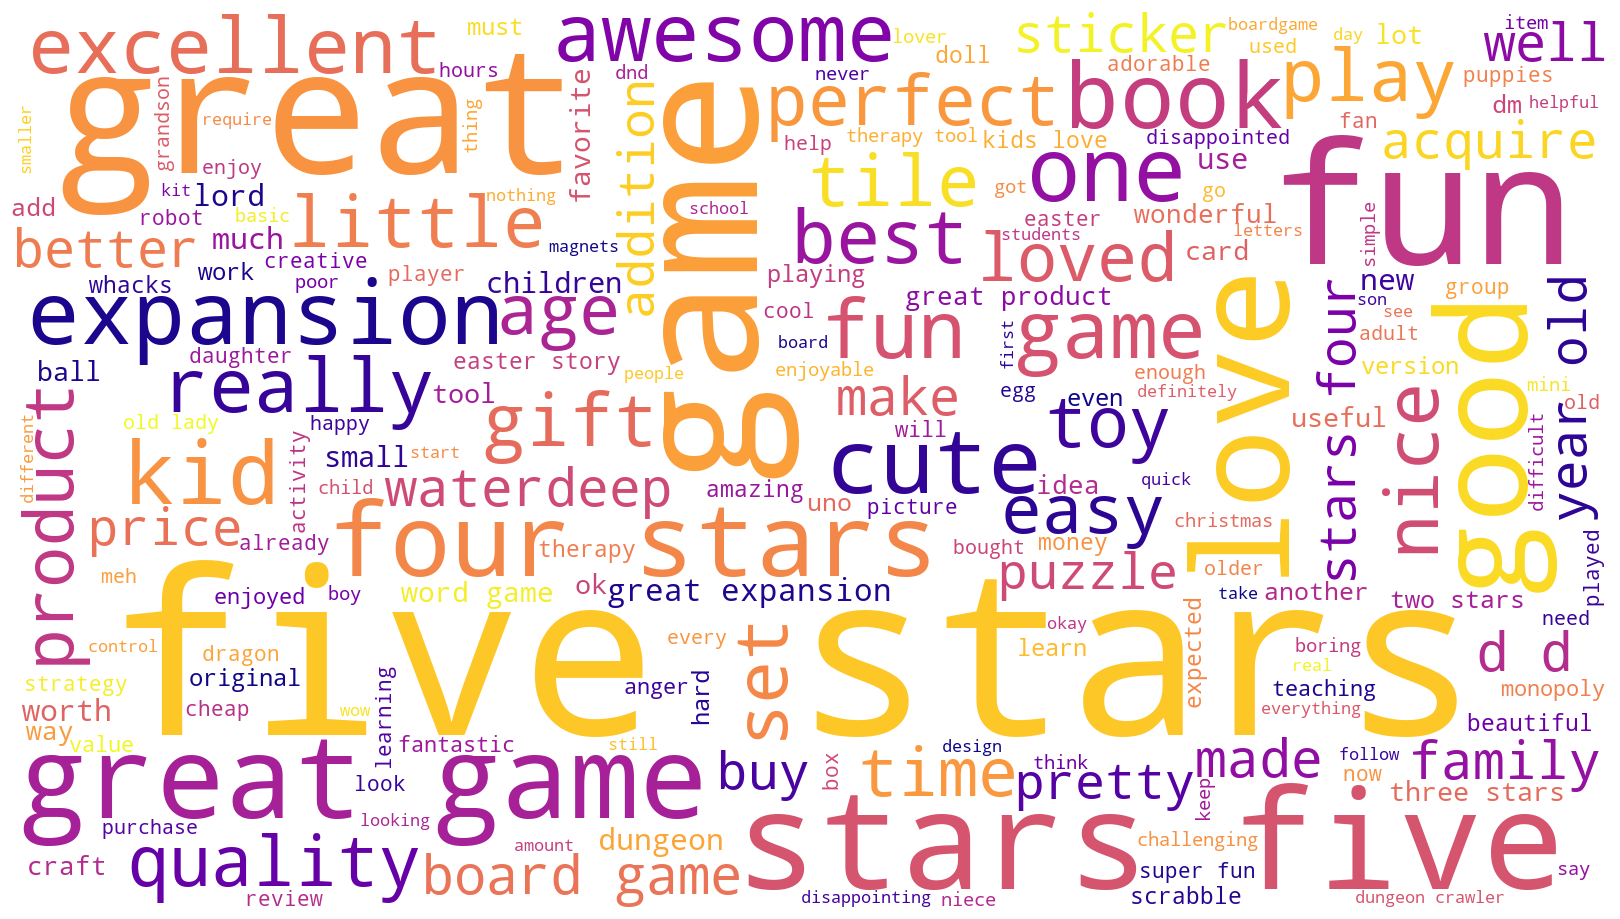

In [115]:
# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

# Save the plot as a file
wordcloud.to_file('plot5.png')

### 4d) Identify 15 most common words and polarity

In [116]:
# Determine the 15 most common words.
# Generate a DataFrame from Counter.
review_count = pd.DataFrame(Counter(tokens1r).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_count

Frequency
Word             
game         1693
great         587
fun           555
one           532
play          504
like          414
love          325
get           320
really        318
cards         301
would         301
tiles         298
time          292
good          290
book          278

In [117]:
# Generate a DataFrame from Counter.
summary_count = pd.DataFrame(Counter(tokens2s).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summary_count

Frequency
Word                
stars            441
five             356
game             318
great            294
fun              217
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               39
awesome           36

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [118]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [119]:
# Populate a new column with polarity scores for each comment in review.
df4_copy['polarity'] = df4_copy['review'].apply(generate_polarity)

# View output.
df4_copy['polarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.628788
4   -0.316667
Name: polarity, dtype: float64

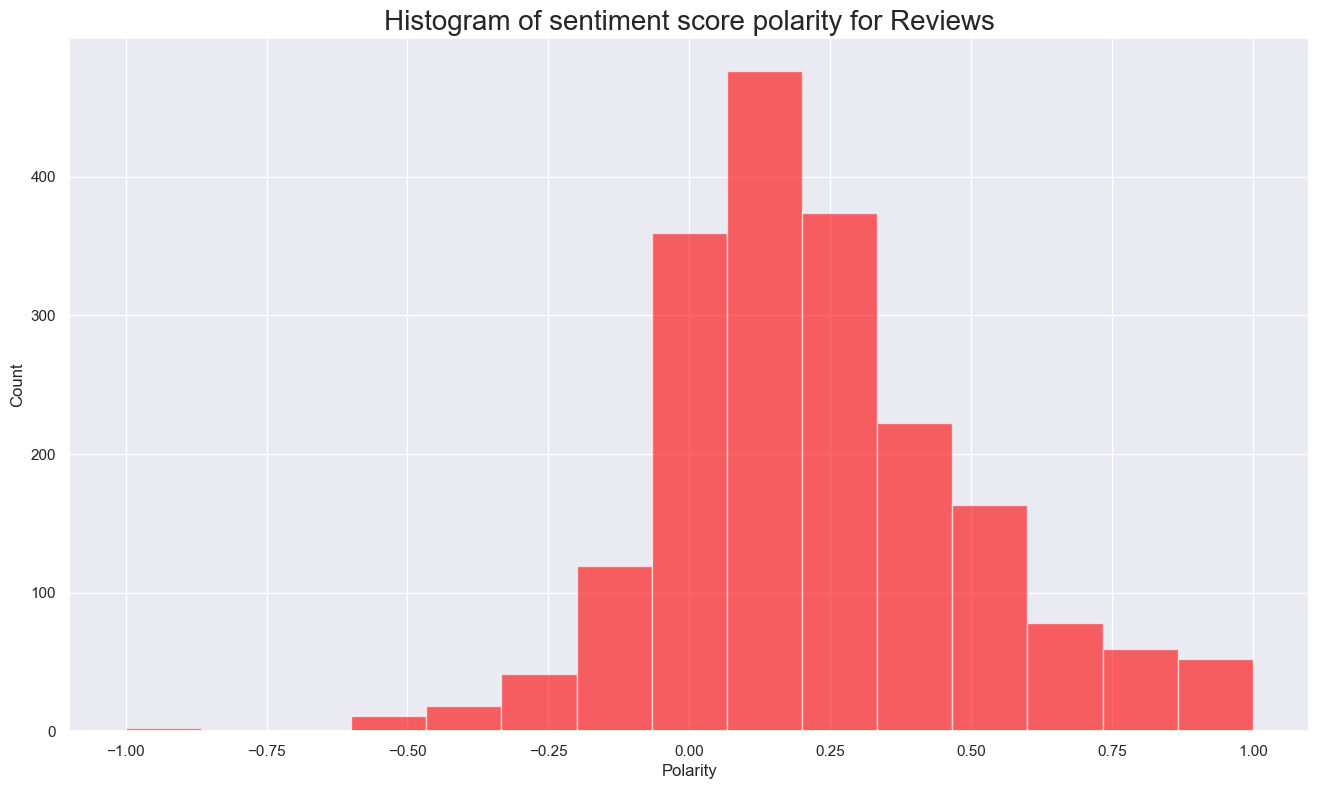

In [120]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4_copy['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Reviews', fontsize=20)

# Save the plot as a file
plt.savefig('plot6.png')

plt.show()

In [121]:
# Populate a new column with polarity scores for each comment in summary.
df4_copy['polarity'] = df4_copy['summary'].apply(generate_polarity)

# Preview the result.
df4_copy['polarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity, dtype: float64

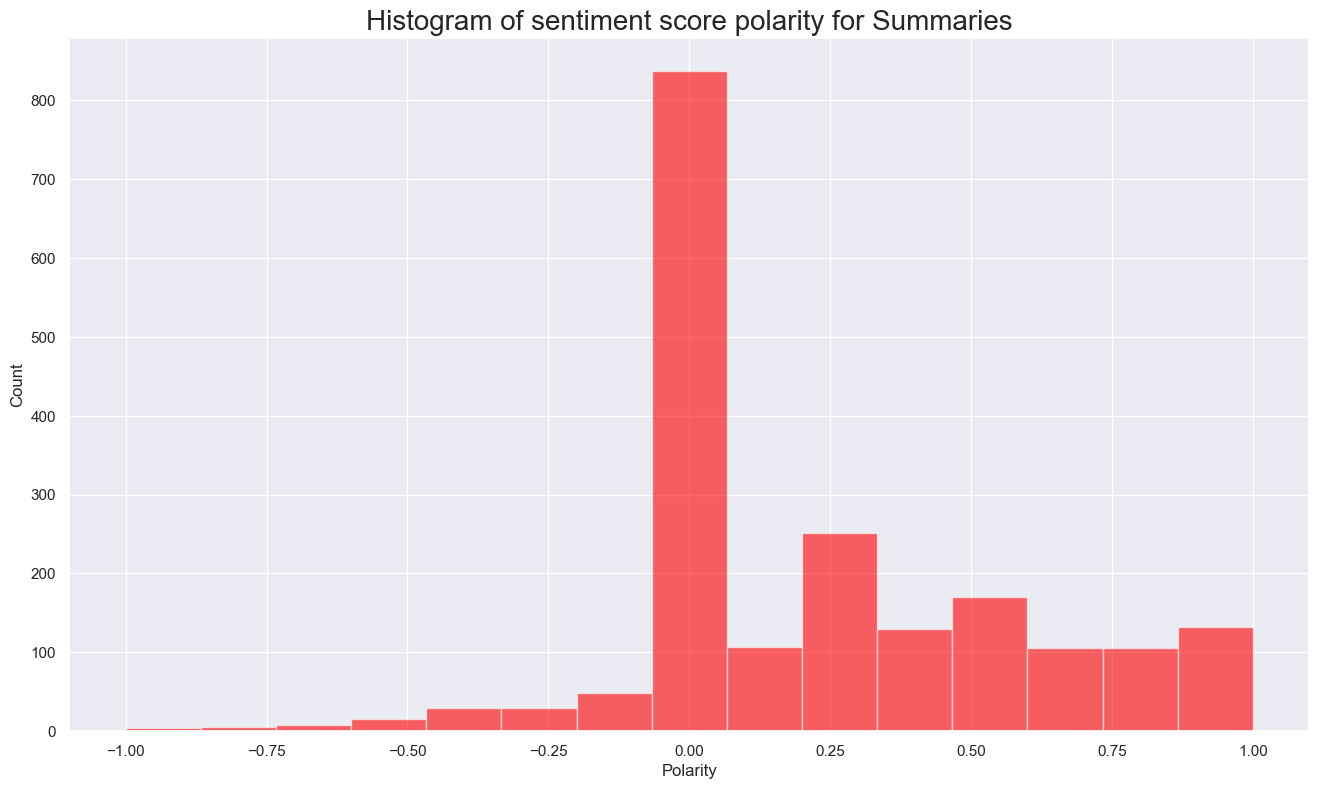

In [122]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4_copy['polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for Summaries', fontsize=20)

# Save the plot as a file
plt.savefig('plot7.png')

plt.show()

The histograms for both reviews and summaries have shown an overall positive sentiment. While the summary histogram has a lot of neutral results, disregarding them reveals that the majority of results are of a positive nature. Similarly, the reviews also exhibit a large number of positive results. These findings confirm earlier observations from the word clouds, indicating positive sentiment within both the reviews and summary data.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [123]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df4_copy.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'polarity']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [124]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df4_copy.nsmallest(20, 'polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'polarity']]

# Adjust the column width.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [125]:
# Top 20 positive reviews
# Create a DataFrame.
positive_sentiment = df4_copy.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['review', 'polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [126]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df4_copy.nlargest(20, 'polarity')

# Eliminate unnecessary columns.
positive_sentiment = positive_sentiment[['summary', 'polarity']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 7. Discuss: Insights and observations

***Your observations here...***

After conducting various analytical methods, it can be confidently concluded that the sentiment from both the reviews and the summary data is positive. The top 20 positive and negative reviews understandably all correspond to the same customer as the summary. Overall, the positive sentiment far outweighs the negative, which bodes well for the business.

Regarding the top 20 negative comments, there doesn't seem to be any specific game at fault for the negative reviews. Further analysis of the reviews could identify a more specific target for improvement to eliminate negative reviews. It would be advisable to engage directly with customers who have negative reviews if this policy is not already in place.

# 